In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filename = "../../results_aggr/app_history_influxdb.csv"
df_latencies = pd.read_csv(filename)

df_latencies.sort_values(by=["number"], inplace=True)

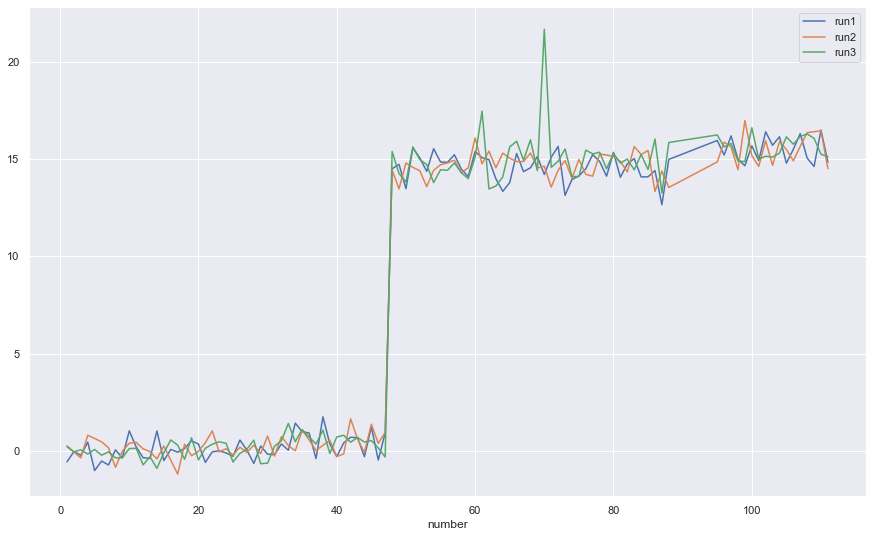

In [3]:
fig, ax = plt.subplots(figsize=(15,9))
for label, df in df_latencies.groupby('run'):
    df.plot(x="number", y = "diffInserts", ax=ax, label=label)
plt.legend()

<AxesSubplot:xlabel='number', ylabel='diffInserts'>

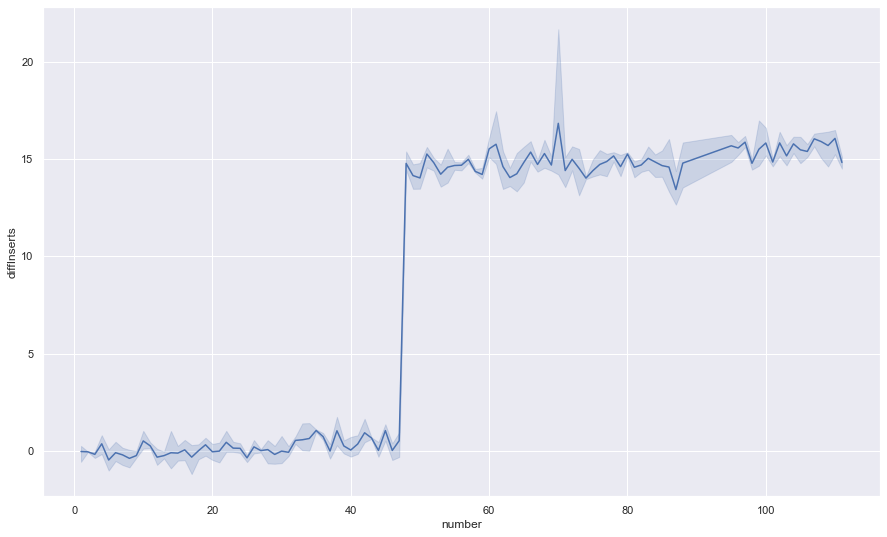

In [4]:
dims = (15,9)
fig, ax = plt.subplots(figsize=dims)

sns.lineplot(ax = ax, x=df_latencies["number"], y=df_latencies["diffInserts"])

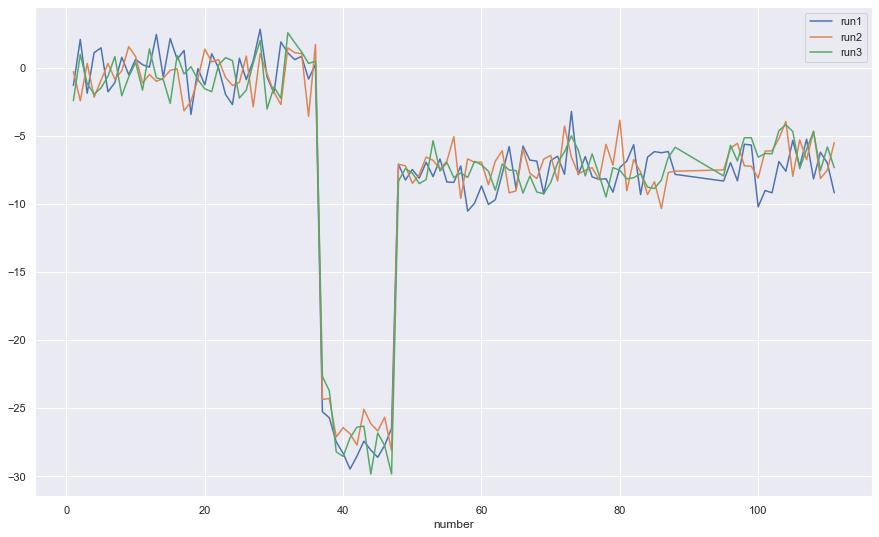

In [5]:
fig, ax = plt.subplots(figsize=(15,9))
for label, df in df_latencies.groupby('run'):
    df.plot(x="number", y = "diffQueries1", ax=ax, label=label)
plt.legend()

<AxesSubplot:xlabel='number', ylabel='diffQueries1'>

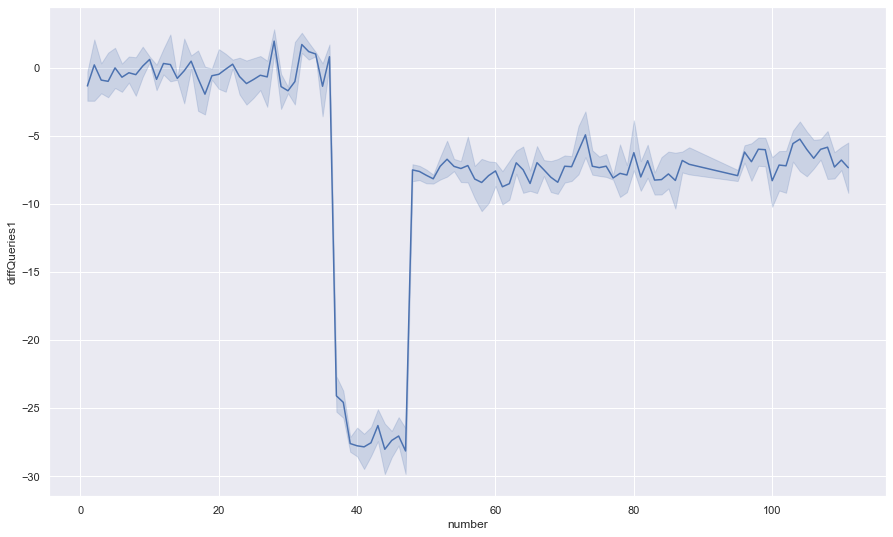

In [6]:
dims = (15,9)
fig, ax = plt.subplots(figsize=dims)

sns.lineplot(ax = ax, x=df_latencies["number"], y=df_latencies["diffQueries1"])

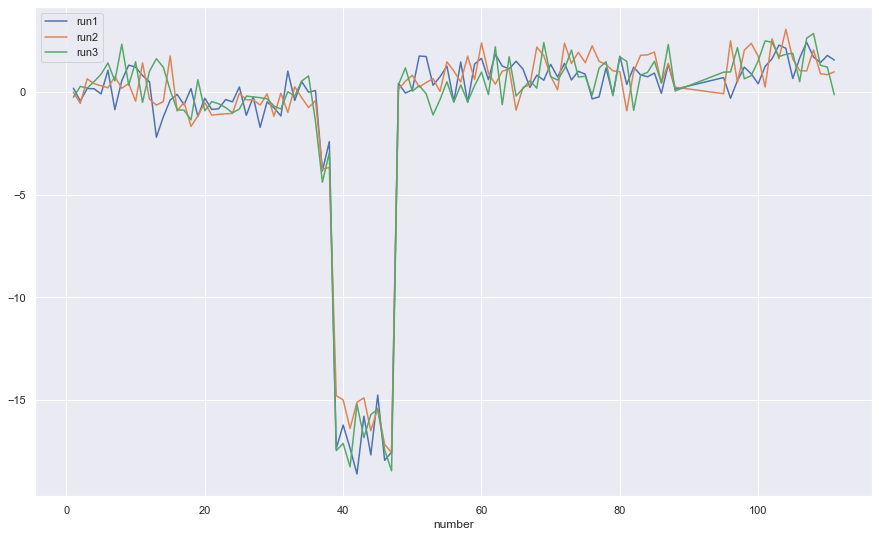

In [7]:
fig, ax = plt.subplots(figsize=(15,9))
for label, df in df_latencies.groupby('run'):
    df.plot(x="number", y = "diffQueries2", ax=ax, label=label)
plt.legend()

<AxesSubplot:xlabel='number', ylabel='diffQueries2'>

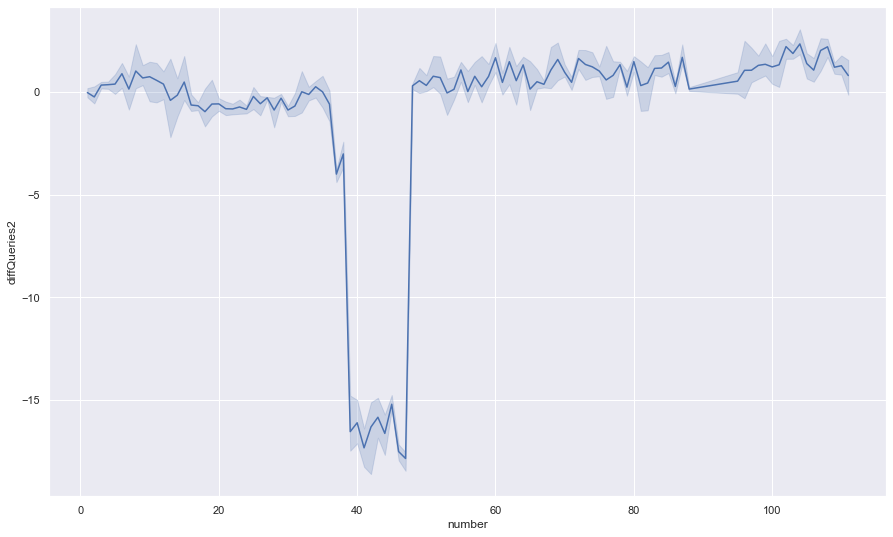

In [8]:
dims = (15,9)
fig, ax = plt.subplots(figsize=dims)

sns.lineplot(ax = ax, x=df_latencies["number"], y=df_latencies["diffQueries2"])